In [14]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Infosys ML Course/defaulter.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


Distance Metrics

In [15]:
#  first data point
x1 = df.loc[0, ["balance","income"]]
# second data point
x2 = df.loc[1, ["balance","income"]]

import numpy as np

np.linalg.norm(x1-x2)



5787.1537602581275

One of the limitations of Euclidean distance is that attributes with larger ranges contribute more value to the Euclidean distance.



In [16]:
# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112
#Distance between t1 and t3 9000.00555555384


Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


To avoid this situation, all the numeric attributes of the tuples can be normalized before they are used for computing the Euclidean distance.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df[["balance", "income"]])
df["norm_balance"] = scaled_values[:,0]
df["norm_income"] = scaled_values[:,1]
df

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [18]:
#distance between two normalized data points
x1_n = df.loc[0,["norm_balance","norm_income"]]
x2_n = df.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)
#output
#1.1489497815843785


1.1489497815843788

In [19]:
# Lambda function to calculate Euclidean distance

x11 = df.loc[10,["norm_balance","norm_income"]]
dist_to_X11 = lambda x: np.linalg.norm(x-x11)

# calculating Euclidean Distance
df["dist_toX11"] = df[["norm_balance","norm_income"]].apply(dist_to_X11,axis=1)
df



,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
0,No,Yes,817.1804,12106.14,0.176304,0.000000,0.704830
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775


In [20]:
# sorting the datapoints based on distance to find the 'k' nearest neighbors
df.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


Let us consider the value of k as 1, which means that, the kNN algorithm assigns a class label based on its nearest neighbor. The kNN algorithm would therefore classify the tuple X11 as default= Yes based on its nearest neighbor X3 (tuple at index 2) since the nearest neighbor (X3) has a class label of default=Yes.

For all values of k greater than 1, a data tuple is classified by a majority vote of its neighbors. The tuple will be assigned the class that is most common among its k nearest neighbors.

If the value of k was selected as 3, the 3-nearest-neighbors of the data tuple X11 (balance=1000, income=16900) are identified. In this case they are X3 (balance=1102.435, income=17391.78, defaulter=Yes), X9(balance=903.1768, income=15810.57, defaulter=No) and X8(balance=870.4124, income=17685.45, defaulter=No) based on the Euclidean distances computed earlier.

The new tuple would be classified as defaulter/non-defaulter based on the majority vote of the neighbors X3, X9 and X8. In this case, the majority vote indicates that the new tuple (X11) would be a non-defaulter.

For k=2, X3 (balance=1102.435, income=17391.78, defaulter=Yes) and X9(balance=903.1768, income=15810.57, defaulter=No) are the 2 closest neighbors of X11 based on the Euclidean distances. In this case, you can see a tie in the votes (i.e. 1 vote for defaulter and 1 vote for non-defaulter).

Therefore, it is difficult to classify the data tuple X11 as defaulter or a non-defaulter because the vote count results in a tie. Typically for binary-class cases (like defaulter= Y/N), an odd value of k is preferred to avoid such tie situations. For multi-class cases (more than 2 classes), the ties can be broken by assigning a class at random or by assigning the class that occurs most frequently.

# Let's build a model

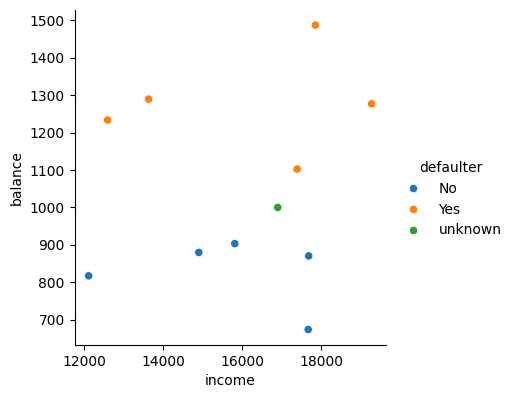

In [21]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(df,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)


You can see a customer with a balance of 1000 and income of 16,900 is currently not classified as either defaulter/non-defaulter. We can use kNN to classify this instance.



In [37]:
from sklearn.model_selection import train_test_split

# # selecting the predictors and target
X=df[['norm_balance','norm_income']]
Y=df['defaulter']

# # splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=100)

In [38]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((9, 2), (2, 2), (9,), (2,))

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [40]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)



0.7777777777777778 1.0


In our example, value chosen for k is 3 while building the model. However, the choice of k affects the performance of the model. So, for the kNN algorithm, k is a hyperparameter that needs to be tuned.

The below code demonstrates the train and test accuracy for different values of k on the defaulter dataset:



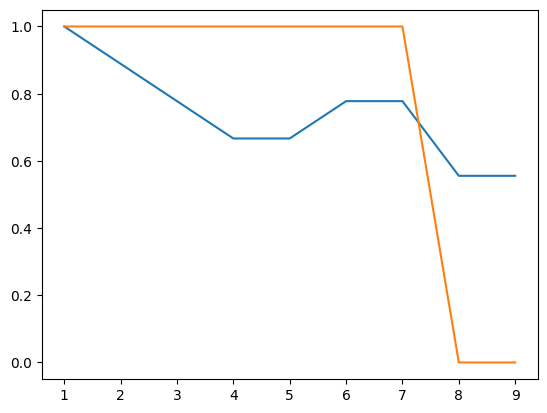

In [44]:
train_accuracies = []
test_accuracies = []

# building KNN model for values of k from 1 to 10
import matplotlib.pyplot as plt

k_vals = [i for i in range(1,10)]

features = ["norm_balance","norm_income"]
target = "defaulter"

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)

plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)
